<h4 class="text-center"> Game Rating Prediction </h4>
<br>

<span class='badge'> Import Library </span>

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='rainbow')

<span class='badge'> Loading Data </span>

In [2]:
raw_data = pd.read_csv('https://raw.githubusercontent.com/ThaWeatherman/scrapers/master/boardgamegeek/games.csv')

In [3]:
raw_data.shape

(81312, 20)

In [4]:
raw_data.to_csv('board_game.csv') #Saving the data 

<h4 class="text-center"> Exploratory Analysis </h4>
<br>

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81312 entries, 0 to 81311
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    81312 non-null  int64  
 1   type                  81312 non-null  object 
 2   name                  81271 non-null  object 
 3   yearpublished         81309 non-null  float64
 4   minplayers            81309 non-null  float64
 5   maxplayers            81309 non-null  float64
 6   playingtime           81309 non-null  float64
 7   minplaytime           81309 non-null  float64
 8   maxplaytime           81309 non-null  float64
 9   minage                81309 non-null  float64
 10  users_rated           81312 non-null  int64  
 11  average_rating        81312 non-null  float64
 12  bayes_average_rating  81312 non-null  float64
 13  total_owners          81312 non-null  int64  
 14  total_traders         81312 non-null  int64  
 15  total_wanters      

##### raw_data['average_rating'] will be the column to predict

In [6]:
raw_data['average_rating'].head(5)

0    8.33774
1    8.28798
2    8.28994
3    8.20407
4    8.14261
Name: average_rating, dtype: float64

In [7]:
#checking the distribution of ['average rating']

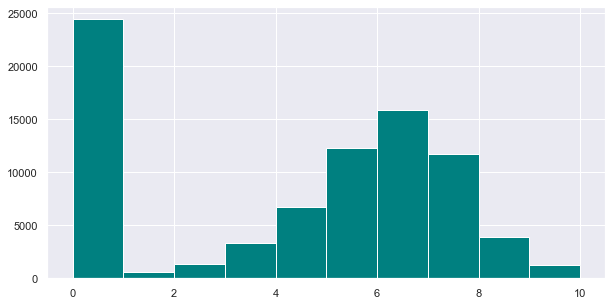

In [8]:
plt.figure(figsize=(10,5))
plt.hist(raw_data['average_rating'],color='teal')
plt.show()

In [9]:
raw_data[raw_data['average_rating']== 0].shape

(24380, 20)

In [10]:
#we can see 24380 games from data are rated 0

In [11]:
#first 5 rows of the game
raw_data[raw_data['average_rating']== 0].head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
13048,318,boardgame,Looney Leo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0,0,1,0,0,0.0
13068,579,boardgame,Field of Fire,2002.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.0,0.0,2,0,0,1,0,0,0.0
13114,894,boardgame,LifeLinks,2000.0,1.0,8.0,10.0,10.0,10.0,8.0,0,0.0,0.0,2,0,1,1,0,0,0.0
13116,897,boardgame,Dear Abby,1992.0,3.0,4.0,60.0,60.0,60.0,13.0,0,0.0,0.0,7,1,0,0,0,0,0.0
13124,946,boardgame,Rolazone,1999.0,2.0,2.0,30.0,30.0,30.0,0.0,0,0.0,0.0,0,0,0,3,0,0,0.0


In [12]:
raw_data[raw_data['average_rating']== 0].tail()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
81307,184441,boardgameexpansion,Micro Rome: Aegyptus,2015.0,1.0,1.0,0.0,30.0,0.0,10.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81308,184442,boardgame,Trivial Pursuit: Marvel Cinematic Universe Da...,2013.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81309,184443,boardgame,BEARanoia,2015.0,2.0,15.0,1.0,1.0,1.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81310,184449,boardgame,Freight,2015.0,2.0,4.0,60.0,30.0,60.0,8.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81311,184451,boardgame,Bingo Animal Kids,2010.0,1.0,6.0,10.0,10.0,10.0,2.0,0,0.0,0.0,0,0,0,0,0,0,0.0


In [13]:
#as we are predicting game rating so all the games that has zero rating will be useless to predict it.
#removing all the rows that has ['user rating'] =  0

In [14]:
raw_data[raw_data['average_rating']== 0]['users_rated'].max()

0

In [15]:
raw_data[raw_data['average_rating']== 0]['users_rated'].min()

0

In [16]:
raw_data[raw_data['average_rating']== 0]['users_rated'].sum()

0

In [17]:
#removing all the rows that got zero ['users_rating']. 

In [18]:
data = raw_data.copy()

In [19]:
data = data[data['users_rated']>0]

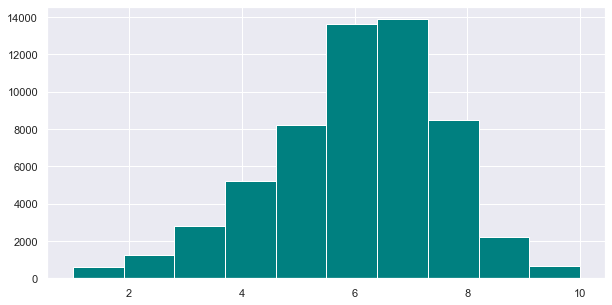

In [20]:
#checking the distriibuton again
plt.figure(figsize=(10,5))
plt.hist(data['average_rating'],color='teal')

plt.show()

In [21]:
#checking if there are any rating less than 1 
data[data['average_rating'] <1 ]

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight


In [22]:
data.shape , raw_data.shape

((56932, 20), (81312, 20))

In [23]:
#taking care of missing values

In [24]:
data.isna().sum()

id                       0
type                     0
name                    36
yearpublished            2
minplayers               2
maxplayers               2
playingtime              2
minplaytime              2
maxplaytime              2
minage                   2
users_rated              0
average_rating           0
bayes_average_rating     0
total_owners             0
total_traders            0
total_wanters            0
total_wishers            0
total_comments           0
total_weights            0
average_weight           0
dtype: int64

In [25]:
#dropping all the missing values. We could check more of the missing data. 
#With some reasearch to find out the reason of the missing names
#for other column the missing value is so small it won't effect the ML model

In [26]:
data.dropna(axis=0,inplace=True)

In [27]:
data.isnull().sum() # no missing value

id                      0
type                    0
name                    0
yearpublished           0
minplayers              0
maxplayers              0
playingtime             0
minplaytime             0
maxplaytime             0
minage                  0
users_rated             0
average_rating          0
bayes_average_rating    0
total_owners            0
total_traders           0
total_wanters           0
total_wishers           0
total_comments          0
total_weights           0
average_weight          0
dtype: int64

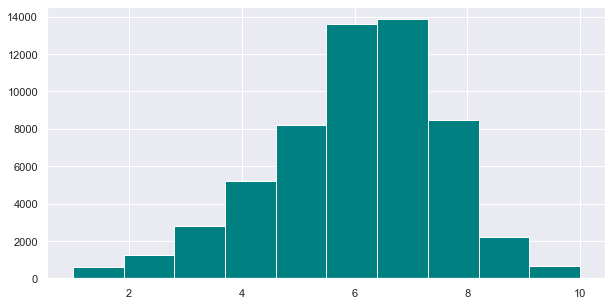

In [28]:
#checking the distriibuton again
plt.figure(figsize=(10,5))
plt.hist(data['average_rating'],color='teal')

plt.show()

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56894 entries, 0 to 81279
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    56894 non-null  int64  
 1   type                  56894 non-null  object 
 2   name                  56894 non-null  object 
 3   yearpublished         56894 non-null  float64
 4   minplayers            56894 non-null  float64
 5   maxplayers            56894 non-null  float64
 6   playingtime           56894 non-null  float64
 7   minplaytime           56894 non-null  float64
 8   maxplaytime           56894 non-null  float64
 9   minage                56894 non-null  float64
 10  users_rated           56894 non-null  int64  
 11  average_rating        56894 non-null  float64
 12  bayes_average_rating  56894 non-null  float64
 13  total_owners          56894 non-null  int64  
 14  total_traders         56894 non-null  int64  
 15  total_wanters      

In [30]:
#checking co-relation on dataset (will work on)

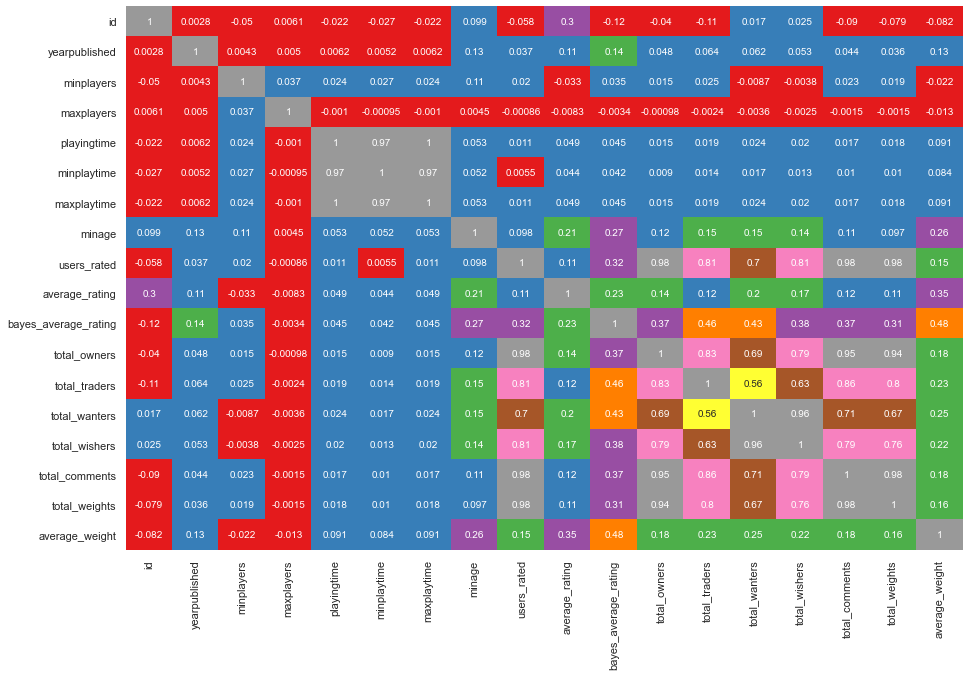

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap='Set1',cbar=False)
plt.show()

In [41]:
#removing ['ID'] column al though it's showing high co-relation it has no explanatory power in real life
data.drop('id',axis=1,inplace=True)

In [54]:
#Creating a list to exclude all the object dataType columns and targets column
data_columns = data.columns.tolist()
data_columns

['type',
 'name',
 'yearpublished',
 'minplayers',
 'maxplayers',
 'playingtime',
 'minplaytime',
 'maxplaytime',
 'minage',
 'users_rated',
 'average_rating',
 'bayes_average_rating',
 'total_owners',
 'total_traders',
 'total_wanters',
 'total_wishers',
 'total_comments',
 'total_weights',
 'average_weight']

In [55]:
new_columns = [c for c in data_columns if c not in ["type","name","average_rating","bayes_average_rating"]]

In [56]:
new_columns

['yearpublished',
 'minplayers',
 'maxplayers',
 'playingtime',
 'minplaytime',
 'maxplaytime',
 'minage',
 'users_rated',
 'total_owners',
 'total_traders',
 'total_wanters',
 'total_wishers',
 'total_comments',
 'total_weights',
 'average_weight']

In [57]:
target = ['average_rating']

<h4 class="text-center"> Creating Train and Test Data </h4>
<br>

In [46]:
#we can do stratified cross validation for creating the train and test data
#Doing simple train_test_split from sklearn

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
train_data = data.sample(frac=0.8,random_state=42)

test_data = data.loc[~data.index.isin(train_data.index)]

In [49]:
train_data.shape,test_data.shape

((45515, 19), (11379, 19))

<span class="badge">creating feature and target column </span> <b> For Train Data </b>

In [70]:
feature_train  = train_data[new_columns]

In [71]:
target_train = train_data[target]

In [72]:
feature_train.shape, target_train.shape

((45515, 15), (45515, 1))

<span class="badge">creating feature and target column </span> <b> From Test Data </b>

In [73]:
feature_test  = test_data[new_columns]

In [74]:
target_test = test_data[target]

In [80]:
target_test.shape

(11379, 1)

<h4 class="text-center"> Linear Model </h4>
<br>

In [50]:
from sklearn.linear_model import LinearRegression

In [52]:
linear_model = LinearRegression()

In [81]:
linear_model.fit(feature_train,target_train)

LinearRegression()

In [82]:
linear_model.score(feature_train,target_train) #adjusted R Squared

0.15930768659178496

In [83]:
#the result is so low Linear model is not a very good model for this datatype

In [84]:
from sklearn.metrics import mean_squared_error

In [87]:
linear_predict = linear_model.predict(feature_test)

In [89]:
mean_squared_error(target_test,linear_predict)

2.0917558169368617

In [91]:
#mean squared error for rating is not good

<h4 class="text-center"> Ensemble Model </h4>
<br>

In [92]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
forest_model = RandomForestRegressor(random_state=42,min_samples_leaf=10)

In [96]:
forest_model.fit(feature_train,target_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(min_samples_leaf=10, random_state=42)

In [97]:
forest_model.score(feature_train,target_train)

0.577832323228235

In [98]:
forest_predict = forest_model.predict(feature_test)

In [99]:
mean_squared_error(target_test,forest_predict)

1.449503075610661

In [100]:
#Random forest has better result here on predicting than linear regression

<h4 class="text-center"> Comparison Between Linear and Ensemble model </h4>
<br>

In [102]:
feature_test.iloc[5]

yearpublished      2009.0000
minplayers            2.0000
maxplayers            4.0000
playingtime          30.0000
minplaytime          30.0000
maxplaytime          30.0000
minage               13.0000
users_rated       19261.0000
total_owners      26403.0000
total_traders       374.0000
total_wanters       461.0000
total_wishers      2281.0000
total_comments     3005.0000
total_weights      1121.0000
average_weight        2.4469
Name: 21, dtype: float64

In [103]:
target_test.iloc[5]

average_rating    7.85479
Name: 21, dtype: float64

In [104]:
rating_linear_model = linear_model.predict(feature_test.iloc[5].values.reshape(1,-1))
rating_forest_model = forest_model.predict(feature_test.iloc[5].values.reshape(1,-1))

In [105]:
print(rating_forest_model)
print(rating_linear_model)

[7.76211196]
[[7.28868197]]


In [106]:
#Random forest has shown better result that linear model